<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Machine Vision Learning
</font>
<hr/>
<font color="#800080" size=5>
LAB 6 : Extracting Key Points with SIFT
<br>
</font>
<font size=5>
Instructor: Dr. H. Mohammad Zadeh
<br>
</font>
<font size=4>
Fall 2024
<br>
</font>
<font face="Times New Roman" size=4>
</font>

</div></font>

In [1]:
Name = "Ali Sadeghian"
SN = "400101464"

## Introduction


In this homework, we explore two fundamental concepts in image processing and feature detection: the **Difference of Gaussians (DOG)** and the **Scale-Invariant Feature Transform (SIFT)**. The DOG filter, a computationally efficient approximation of the Laplacian of Gaussian (LOG), is employed to identify blob-like structures within images by detecting scale-space extrema. Building upon this, SIFT leverages scale-space theory to extract distinctive keypoints and descriptors that are invariant to image transformations such as scaling, rotation, and illumination changes. 

The study delves into the mathematical foundations and practical applications of these methods, demonstrating their effectiveness in feature detection and object recognition tasks. Additionally, the performance of these techniques is evaluated through experiments, including clustering of keypoints, feature matching between images, and analyzing the impact of various parameters. By combining theoretical insights with hands-on implementation, this work highlights the significance of DOG and SIFT in modern computer vision tasks. 



## Libraries

In [14]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import random

## Reading data

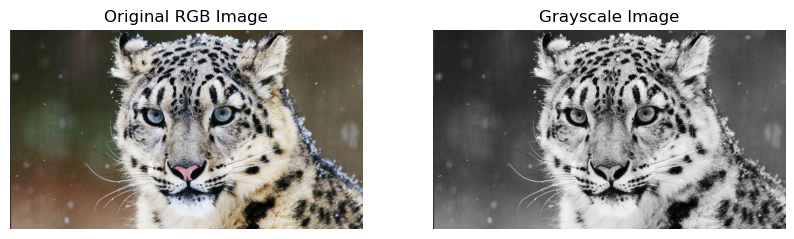

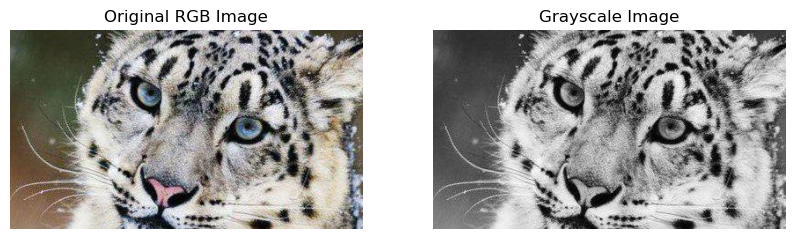

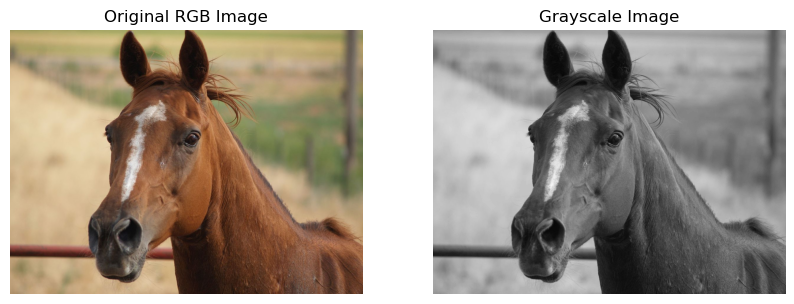

In [3]:
# Specify the relative path where the images are located
input_folder = "./"  

# List to store grayscale images
gray_images = []
rgb_images = []
# Get a list of all image files in the specified folder
image_files = glob.glob(os.path.join(input_folder, "*.jpg"))  # Adjust extension if needed

for image_file in image_files:
    # Read the image in RGB format
    image_rgb = cv2.imread(image_file)

    # Convert the RGB image to grayscale
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

    # Append the rgb and grayscale images to the lists
    rgb_images.append(image_rgb)
    gray_images.append(image_gray)

    # Display the original and grayscale images
    plt.figure(figsize=(10, 5))

    # Show the original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
    plt.title("Original RGB Image")
    plt.axis("off")

    # Show the grayscale image
    plt.subplot(1, 2, 2)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")

    plt.show()

## LOG

#### 1. **Laplacian of Gaussian (LOG):**
The **Laplacian of Gaussian (LOG)** is a popular edge-detection filter that identifies regions of rapid intensity changes in an image, often corresponding to edges or boundaries. Mathematically, the LOG operator is defined as the second derivative of the Gaussian function convolved with the image. This combination enables the LOG to capture edges effectively while reducing noise, as the Gaussian smoothing suppresses high-frequency components.

The LOG operator is represented as:
$$
\nabla^2 g(x, y; \sigma) = -\frac{1}{2\pi\sigma^4} \left( 2 - \frac{x^2 + y^2}{\sigma^2} \right) e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$
Where:
- $ g(x, y; \sigma) $ is the Gaussian kernel.
- $ \sigma $ is the standard deviation controlling the extent of smoothing.

#### 2. **Approximation Using the Difference of Gaussians (DOG):**
Direct computation of the LOG can be computationally expensive. A more efficient approach involves approximating the LOG with the **Difference of Gaussians (DOG)**, which is much faster to compute. The DOG filter is defined as:
$$
DOG(x, y; \sigma) = G(x, y; K\sigma) - G(x, y; \sigma)
$$
Where:
- $ G(x, y; \sigma) $ is the Gaussian kernel applied with standard deviation $ sigma $.
- $K $ is a scaling factor (usually $ K \approx 1.6 $) to create two slightly different scales of the Gaussian blur.

This approximation is based on the observation that:
$$
DOG(x, y; \sigma) \approx \sigma \nabla^2 g(x, y; \sigma)
$$
For small values of $ K $, the DOG closely resembles the LOG in terms of behavior, capturing blob-like features and edge transitions effectively.

#### 3. **Key Insights:**
- **Efficiency:** DOG avoids the need to compute second derivatives explicitly, making it computationally faster than LOG.
- **Scalability:** By varying $ \sigma $ and $ K $, DOG can detect features at multiple scales, which is foundational in algorithms like SIFT.
- **Behavior:** The subtraction operation in DOG effectively highlights regions where intensity changes rapidly, mimicking the behavior of the LOG operator.

#### 4. **Implementation Details:**
In the provided code:
1. **Two Gaussian Blurs:** GaussianBlur is applied twice, with small ($ (1, 1) $) and larger ($ (3, 3) $) kernels. 
2. **Difference of Gaussians:** The difference between the two blurred images represents the DOG approximation of the LOG operator.
3. **Visualization:** The resulting DOG-filtered images are displayed alongside the original grayscale images to highlight edge-detected regions.

This method efficiently detects edges while maintaining computational simplicity, making it suitable for practical image processing tasks. By analyzing the results, you can discuss the effectiveness of DOG as an approximation of LOG and explore its applications in blob detection and scale-space theory.

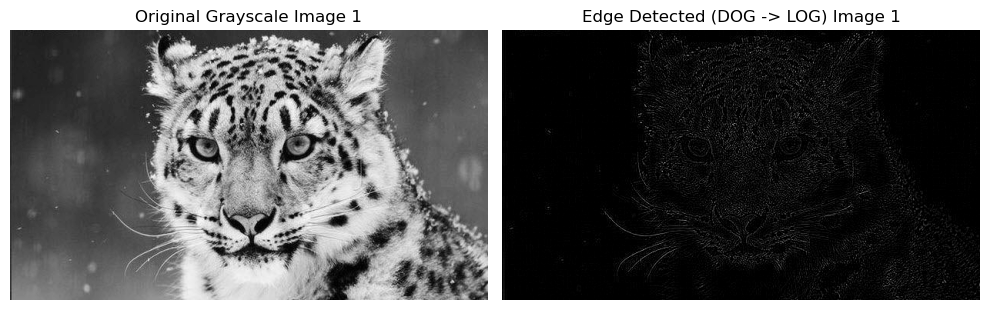

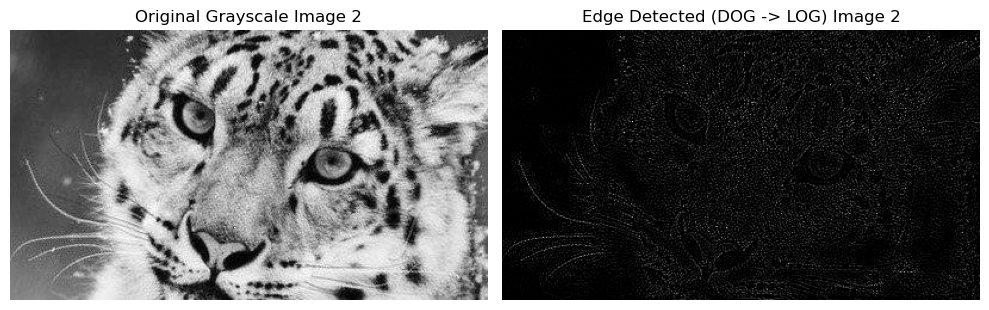

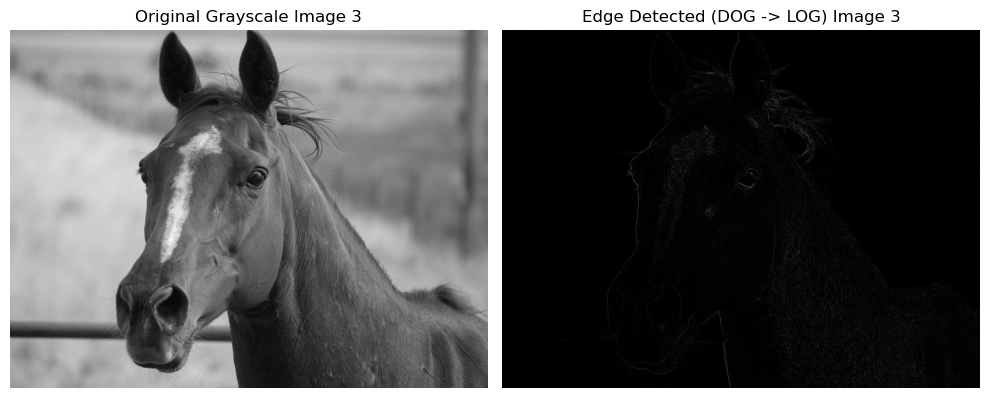

In [9]:
# Define the DOG filter function
def apply_dog_filter(image):
    # Apply GaussianBlur with two different kernel sizes
    gaussian1 = cv2.GaussianBlur(image, (1, 1), 0)
    gaussian2 = cv2.GaussianBlur(image, (3, 3), 0)
    
    # Compute the Difference of Gaussians (DOG)
    dog = cv2.subtract(gaussian1, gaussian2)
    return dog

# Display the results for each grayscale image
for i, gray_image in enumerate(gray_images):
    # Apply the DOG filter
    log_approx = apply_dog_filter(gray_image)
    
    # Plot the original and edge-detected images
    plt.figure(figsize=(10, 5))
    
    # Original grayscale image
    plt.subplot(1, 2, 1)
    plt.title(f"Original Grayscale Image {i+1}")
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')
    
    # LOG approximated image
    plt.subplot(1, 2, 2)
    plt.title(f"Edge Detected (DOG -> LOG) Image {i+1}")
    plt.imshow(log_approx, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

## Scale Invariant Feature Transform (SIFT)

The **Scale Invariant Feature Transform (SIFT)** is a computer vision algorithm for detecting and describing local features in images. Introduced by **David Lowe in 2004**, SIFT has become a cornerstone in feature detection and matching tasks due to its **invariance to scale, rotation, and partial affine transformations**. Below is a detailed explanation of the algorithm and its implementation in the provided code.

---

#### **Key Steps in SIFT**

1. **Scale-Space Construction**:
   - SIFT builds a scale-space representation of the image by convolving it with a series of **Gaussian filters** at multiple scales.
   - The Difference of Gaussians (DOG) is then computed between successive blurred images to efficiently approximate the Laplacian of Gaussian (LOG), which helps in identifying potential interest points.

   $$
   DOG(x, y, \sigma) = G(x, y, k\sigma) - G(x, y, \sigma)
   $$

   - This process captures features at various scales, making SIFT **scale-invariant**.

2. **Keypoint Localization**:
   - Potential keypoints are identified as local maxima or minima in the DOG images.
   - A 3×3×3 neighborhood is examined in the DOG pyramid, and the pixel with the maximum or minimum value is marked as a candidate keypoint.
   - To improve accuracy, candidates are refined by discarding:
     - Low-contrast points (controlled by the `contrastThreshold` parameter).
     - Edge-like features that lack uniqueness (controlled by the `edgeThreshold` parameter).

3. **Orientation Assignment**:
   - For each keypoint, an orientation is assigned based on the **dominant direction of gradients** in its neighborhood.
   - The image gradients are calculated using:
     $$
     \nabla f(x, y) = \sqrt{(f_{x})^2 + (f_{y})^2}, \quad \theta = \tan^{-1} \left( \frac{f_{y}}{f_{x}} \right)
     $$

   - This step makes the features **rotation-invariant**.

4. **Keypoint Descriptor Generation**:
   - A **16×16 window** around each keypoint is divided into 16 smaller 4×4 cells.
   - Within each cell, a histogram of gradient orientations is created, quantized into 8 bins.
   - The resulting descriptor is a 128-dimensional vector (\(16 \times 8\)) that is normalized to ensure invariance to lighting changes.

5. **Keypoint Matching**:
   - Keypoints between two images are matched using their descriptors.
   - The matching process often employs metrics like **Euclidean distance** to find the closest descriptor pairs.

---

#### **Code Walkthrough**

1. **Keypoint Detection and Visualization**:
   - The function `sift_keypoints_extraction` detects keypoints using the SIFT algorithm and overlays them on the input image.
   - Parameters like `nfeatures`, `contrastThreshold`, `edgeThreshold`, and `sigma` control the number, quality, and scale of the detected keypoints.

   **Example Analysis**:
   - The number of keypoints detected in each image varies depending on texture and feature richness.

2. **Feature Matching**:
   - Descriptors of keypoints from two images are matched using a **Brute-Force Matcher (BFMatcher)**.
   - Matches are sorted by distance, with the best matches displayed.
   - The number of matches gives an indication of how similar the two images are in terms of features.

---

#### **Applications of SIFT**
- Object recognition.
- Image stitching in panorama creation.
- 3D structure reconstruction.
- Motion tracking.

SIFT’s robustness to scale and rotation makes it a reliable algorithm for real-world vision problems. The implementation above demonstrates its utility in detecting, describing, and matching features across images effectively.

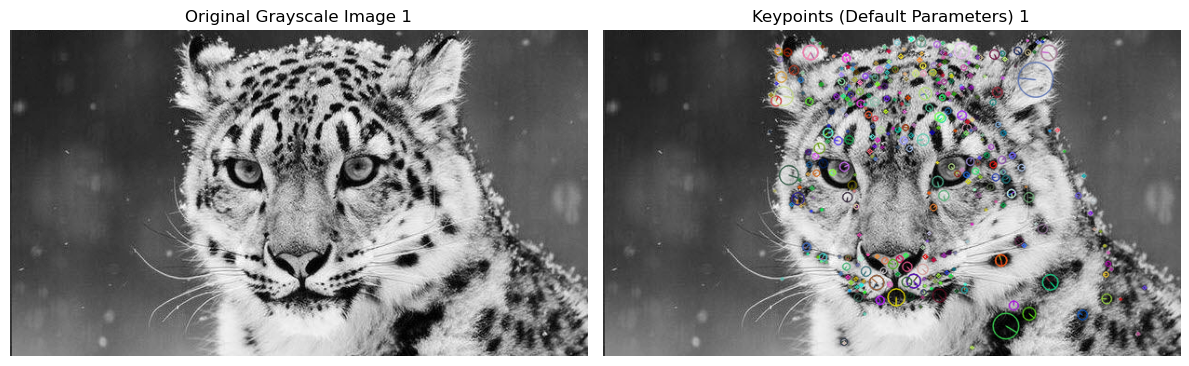

Image 1: Number of keypoints detected = 500


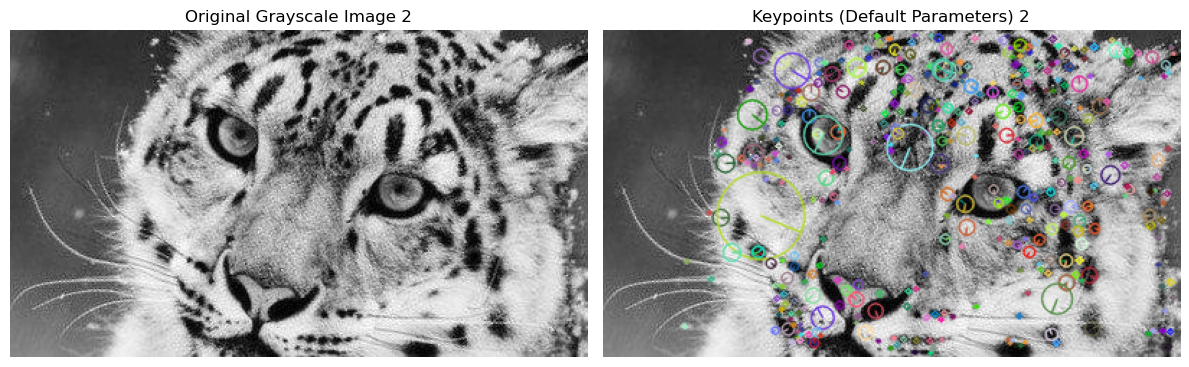

Image 2: Number of keypoints detected = 502


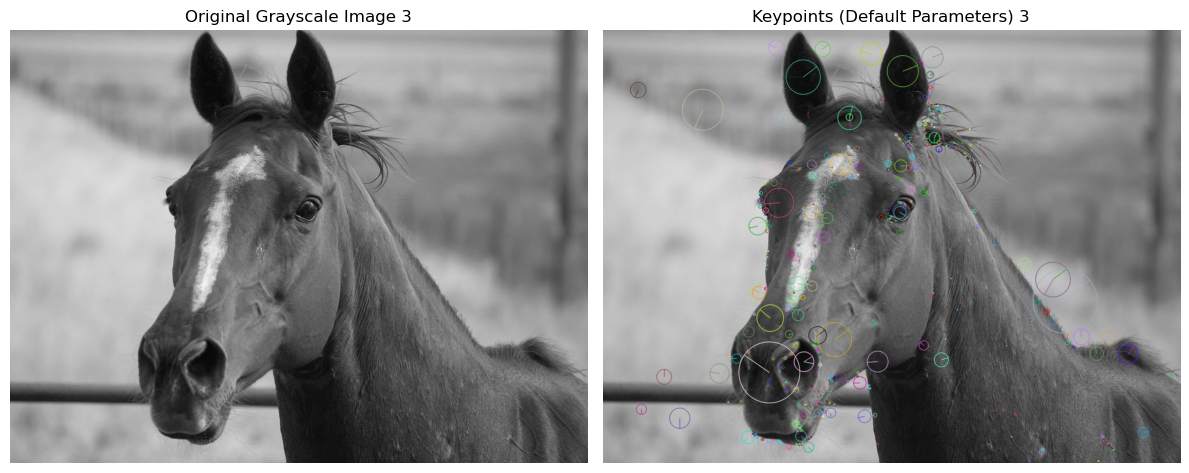

Image 3: Number of keypoints detected = 500


In [ ]:
# Function to extract and visualize keypoints using SIFT
def sift_keypoints_extraction(image,nOctaveLayers=3,nfeatures=500, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6):
    
    # Create SIFT object with specified parameters
    sift = cv2.SIFT_create(
        nOctaveLayers=nOctaveLayers,
        nfeatures=nfeatures,
        contrastThreshold=contrastThreshold,
        edgeThreshold=edgeThreshold,
        sigma=sigma
    )
    
    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(image, None)
    
    # Draw keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(
        image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    
    return keypoints, descriptors, image_with_keypoints

# Process and visualize keypoints for all grayscale images
for i, gray_image in enumerate(gray_images):
    # Extract keypoints with default parameters
    keypoints, descriptors, image_with_keypoints = sift_keypoints_extraction(gray_image)
    
    # Display original and keypoints image
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title(f"Original Grayscale Image {i+1}")
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title(f"Keypoints (Default Parameters) {i+1}")
    plt.imshow(image_with_keypoints, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Image {i+1}: Number of keypoints detected = {len(keypoints)}")

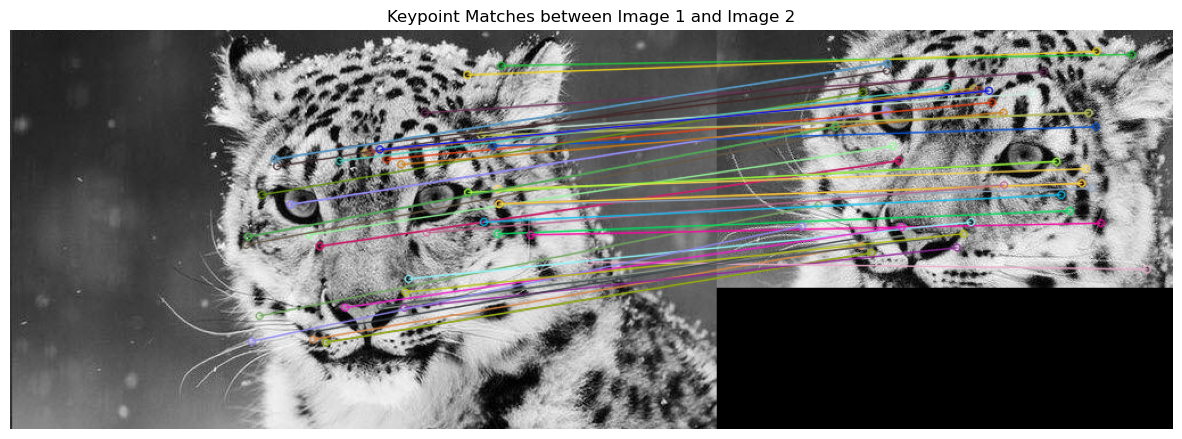

Total keypoints in Image 1: 900
Total keypoints in Image 2: 899
Number of matches: 483


In [18]:
# Function to extract SIFT keypoints and descriptors
def extract_sift_features(image,nOctaveLayers=3,nfeatures=900, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6):
    sift = cv2.SIFT_create(
        nOctaveLayers=nOctaveLayers,
        nfeatures=nfeatures,
        contrastThreshold=contrastThreshold,
        edgeThreshold=edgeThreshold,
        sigma=sigma
    )
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

# Load images from gray_images
image1 = gray_images[0]
image2 = gray_images[1]

# Extract SIFT features for both images
keypoints1, descriptors1 = extract_sift_features(image1)
keypoints2, descriptors2 = extract_sift_features(image2)

# Use Brute-Force Matcher to find the closest matches
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
matched_image = cv2.drawMatches(
    image1, keypoints1, image2, keypoints2, matches[:50], None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Display the matches
plt.figure(figsize=(15, 10))
plt.title("Keypoint Matches between Image 1 and Image 2")
plt.imshow(matched_image)
plt.axis('off')
plt.show()

# Analysis
print(f"Total keypoints in Image 1: {len(keypoints1)}")
print(f"Total keypoints in Image 2: {len(keypoints2)}")
print(f"Number of matches: {len(matches)}")


#### **Output Analysis**
From the provided output:
- **Image 1** has **900 keypoints**, and **Image 2** has **899 keypoints**.
- **483 matches** are identified, showcasing significant feature overlap between the two images.

The visualization of matches demonstrates the algorithm's ability to handle rotation, scale differences, and minor affine transformations.

---

#### **Experimentation and Tuning**
The algorithm’s performance can be adjusted using parameters:
- `nOctaveLayers`: Number of layers per octave; increasing it captures finer details.
- `contrastThreshold`: Higher values filter weak keypoints but might miss subtle features.
- `sigma`: Determines the Gaussian blur’s smoothness, affecting feature extraction.

By experimenting with these parameters, you can tailor SIFT for specific applications, such as matching blurred or high-contrast images.


## Decision 

#### Extract Keypoints from Two Images
We start by extracting 1000 keypoints from each of the two images (`img1.jpg` and `img3.jpg`) using the SIFT algorithm. These keypoints represent distinct and descriptive features in the images, making them robust to changes in rotation, scaling, and partial transformations.

---

#### Cluster Keypoints Using K-Means
The 2000 extracted keypoints from the two images are clustered into 10 groups using the **K-Means clustering algorithm**. Each cluster represents a group of similar features based on their descriptors in a 128-dimensional space.

---

#### Create Histograms for Keypoints
For each image, we compute a **histogram of cluster membership**, which counts the number of keypoints in each cluster. These histograms act as a **feature vector** representing the distribution of keypoints in each image.

---

#### Analyze Histograms
- **Observations**:
  - When two images are similar (e.g., one is a rotated or resized version of the other), their histograms have similar distributions.
  - When two images are different, the histograms show significant variation.
- This observation suggests that the similarity of histograms can be used as a metric for identifying whether two images belong to the same category or not.

---

#### Training a Classifier
Given a **training set of labeled image pairs**, we can build a simple **binary classifier**:
1. **Training Phase**:
   - Compute histograms for all training images.
   - Use a distance metric (e.g., **Euclidean distance**) to compare histograms of image pairs.
   - Define a threshold for similarity based on distances observed in the training data.
   - Train a classifier to output `1` for similar pairs (same image) and `0` for dissimilar pairs (different images).
   
2. **Testing Phase**:
   - For a test image pair:
     - Compute histograms.
     - Measure the histogram distance.
     - Compare the distance to the learned threshold and classify accordingly.

---

#### Advantages
- The method is **rotation and scale invariant** due to SIFT.
- Histograms are compact and computationally efficient to compare.

#### Limitations
- May not perform well with significant illumination changes.
- The threshold may need fine-tuning for different datasets.

This approach provides a robust pipeline for identifying whether two images are similar or different based on their keypoint distributions.

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


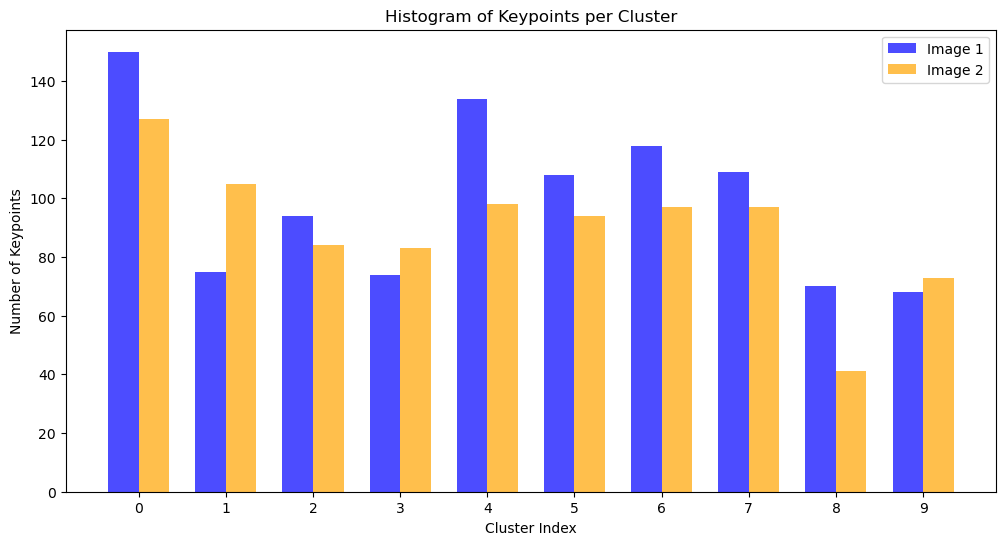

Total keypoints in Image 1: 1000
Total keypoints in Image 2: 899


In [22]:
# Function to extract fixed number of SIFT keypoints and descriptors
def extract_fixed_sift_features(image, nfeatures=1000):
    sift = cv2.SIFT_create(nfeatures=nfeatures)
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

# Load the images from gray_images
image1 = gray_images[0]
image3 = gray_images[1]

# Extract 1000 keypoints and descriptors for each image
keypoints1, descriptors1 = extract_fixed_sift_features(image1, nfeatures=1000)
keypoints2, descriptors2 = extract_fixed_sift_features(image3, nfeatures=1000)

# Combine descriptors from both images for clustering
combined_descriptors = np.vstack((descriptors1, descriptors2))

# Apply K-Means clustering
k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(combined_descriptors)

# Separate cluster labels for each image
labels_image1 = cluster_labels[:len(descriptors1)]
labels_image2 = cluster_labels[len(descriptors1):]

# Create histograms of clusters for each image
hist_image1, _ = np.histogram(labels_image1, bins=np.arange(k + 1))
hist_image3, _ = np.histogram(labels_image2, bins=np.arange(k + 1))

# Visualize histograms
plt.figure(figsize=(12, 6))
bar_width = 0.35

# Histogram for Image 1
plt.bar(np.arange(k) - bar_width / 2, hist_image1, bar_width, label="Image 1", alpha=0.7, color='blue')

# Histogram for Image 3
plt.bar(np.arange(k) + bar_width / 2, hist_image3, bar_width, label="Image 2", alpha=0.7, color='orange')

plt.xlabel("Cluster Index")
plt.ylabel("Number of Keypoints")
plt.title("Histogram of Keypoints per Cluster")
plt.xticks(np.arange(k))
plt.legend()
plt.show()

# Analyze results
print(f"Total keypoints in Image 1: {len(keypoints1)}")
print(f"Total keypoints in Image 2: {len(keypoints2)}")

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


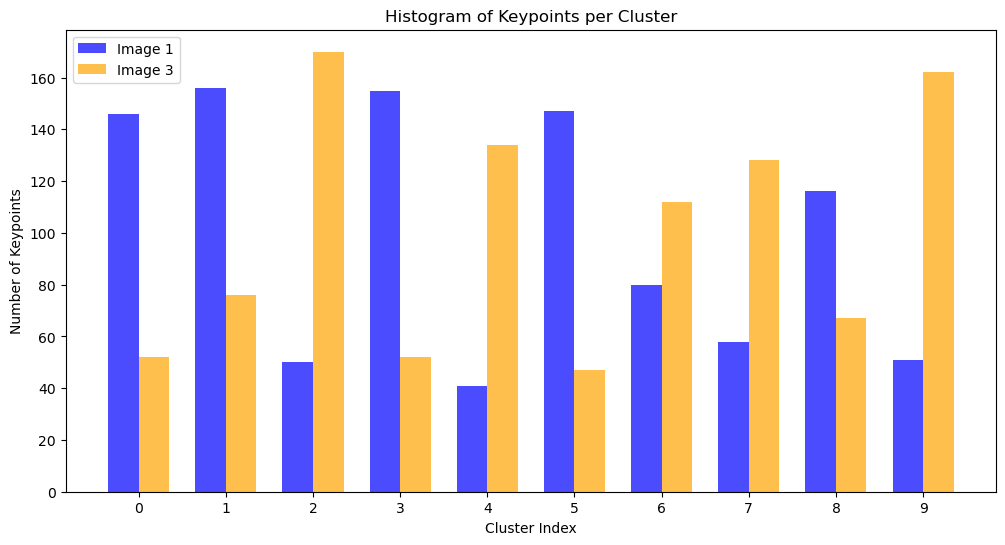

Total keypoints in Image 1: 1000
Total keypoints in Image 3: 1000


In [23]:
# Function to extract fixed number of SIFT keypoints and descriptors
def extract_fixed_sift_features(image, nfeatures=1000):
    sift = cv2.SIFT_create(nfeatures=nfeatures)
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

# Load the images from gray_images
image1 = gray_images[0]
image3 = gray_images[2]

# Extract 1000 keypoints and descriptors for each image
keypoints1, descriptors1 = extract_fixed_sift_features(image1, nfeatures=1000)
keypoints3, descriptors3 = extract_fixed_sift_features(image3, nfeatures=1000)

# Combine descriptors from both images for clustering
combined_descriptors = np.vstack((descriptors1, descriptors3))

# Apply K-Means clustering
k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(combined_descriptors)

# Separate cluster labels for each image
labels_image1 = cluster_labels[:len(descriptors1)]
labels_image3 = cluster_labels[len(descriptors1):]

# Create histograms of clusters for each image
hist_image1, _ = np.histogram(labels_image1, bins=np.arange(k + 1))
hist_image3, _ = np.histogram(labels_image3, bins=np.arange(k + 1))

# Visualize histograms
plt.figure(figsize=(12, 6))
bar_width = 0.35

# Histogram for Image 1
plt.bar(np.arange(k) - bar_width / 2, hist_image1, bar_width, label="Image 1", alpha=0.7, color='blue')

# Histogram for Image 3
plt.bar(np.arange(k) + bar_width / 2, hist_image3, bar_width, label="Image 3", alpha=0.7, color='orange')

plt.xlabel("Cluster Index")
plt.ylabel("Number of Keypoints")
plt.title("Histogram of Keypoints per Cluster")
plt.xticks(np.arange(k))
plt.legend()
plt.show()

# Analyze results
print(f"Total keypoints in Image 1: {len(keypoints1)}")
print(f"Total keypoints in Image 3: {len(keypoints3)}")